## HR Analytics: Job Change of Data Scientist

# Data Cleaning

## 1. Introduction

### 1.1. Motivation

In this work, I will try to show why we wouldn't want to use dropna() as long as we can. Dropping information from our dataframe may cause loosing valuable information. Most of the times some values are missing for a reason, for example, when we ask the field of PhD to a person who does not have even BSc. In such cases, we do not only lose some data, but also this would harm the bias of our data. I will try to show a careful data cleaning process and prepare a dataframe ready for machine learning process. 

### 1.2. Data Context

"A company which is active in Big Data and Data Science wants to hire data scientists among people who successfully pass some courses which conduct by the company. Many people signup for their training. Company wants to know which of these candidates are really wants to work for the company after training or looking for a new employment because it helps to reduce the cost and time as well as the quality of training or planning the courses and categorization of candidates. Information related to demographics, education, experience are in hands from candidates signup and enrollment."

The data can be found here: https://www.kaggle.com/datasets/uniabhi/hr-analytics-job-change-of-data-scientists

## 2. Data Cleaning Process

### 2.1. Importing Libraries and Dataset

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
df_train = pd.read_csv("../kaggle/hrDataSc/aug_train.csv")

In [16]:
df_test = pd.read_csv("../kaggle/hrDataSc/aug_test.csv")

In [19]:
df_train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [21]:
df_test.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [23]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
enrollee_id,19158.0,16875.358179,9616.292592,1.000,8554.25,16982.500,25169.75,33380.000
city_development_index,19158.0,0.828848,0.123362,0.448,0.74,0.903,0.92,0.949
training_hours,19158.0,65.366896,60.058462,1.000,23.00,47.000,88.00,336.000
target,19158.0,0.249348,0.432647,0.000,0.00,0.000,0.00,1.000


In [24]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
enrollee_id,2129.0,16861.614843,9576.846029,3.000,8562.000,16816.000,25129.00,33353.000
city_development_index,2129.0,0.824984,0.125074,0.448,0.698,0.903,0.92,0.949
training_hours,2129.0,64.983091,60.238660,1.000,23.000,47.000,86.00,334.000


<br><br><br>

### 2.2. Data Cleaning / Preprocessing

Workflow for preparing dataframe for machine learning process is as follows:

<ul>
<li>Creating DataFrame</li>
<li>Removing extra columns that would not contribute the target value</li>
<li>Feature Analysis</li>
<li>Dealing with missing values</li>
<li>Creating additional features if necessary</li>
</ul>

<br><br>

#### 2.2.1. Creating Dataframe

Before we begin, note that train and test data are given in different tables. We can start by concating them so that we will not have to do the process twice.

In [27]:
df_train["label"] = "train"

In [28]:
df_test["label"] = "test"

In [29]:
df = pd.concat([df_train,df_test], ignore_index=True)

In [30]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,label
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0,train
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0,train
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0,train
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0,train
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0,train


<br><br><br>

#### 2.2.2. Dropping Extra Columns

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21287 entries, 0 to 21286
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             21287 non-null  int64  
 1   city                    21287 non-null  object 
 2   city_development_index  21287 non-null  float64
 3   gender                  16271 non-null  object 
 4   relevent_experience     21287 non-null  object 
 5   enrolled_university     20870 non-null  object 
 6   education_level         20775 non-null  object 
 7   major_discipline        18162 non-null  object 
 8   experience              21217 non-null  object 
 9   company_size            14727 non-null  object 
 10  company_type            14513 non-null  object 
 11  last_new_job            20824 non-null  object 
 12  training_hours          21287 non-null  int64  
 13  target                  19158 non-null  float64
 14  label                   21287 non-null

First, we can assign enrollee id as index.

In [34]:
df.index = df["enrollee_id"]

In [35]:
df.drop("enrollee_id",axis = 1,inplace=True)

<br>Since there is city development index, we can drop city.

In [36]:
df.drop("city", axis=1, inplace=True)

In [37]:
df.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,label
enrollee_id,,,,,,,,,,,,,
8949,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0,train
29725,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0,train
11561,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0,train
33241,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0,train
666,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0,train


<br><br>

#### 2.2.3. Feature Analysis

**enrollee_id**: Unique ID for candidate

**city**: City code

**city_ development _index**: Developement index of the city (scaled)

**gender**: Gender of candidate

**relevent_experience**: Relevant experience of candidate

**enrolled_university**: Type of University course enrolled if any

**education_level**: Education level of candidate

**major_discipline**: Education major discipline of candidate

**experience**: Candidate total experience in years

**company_size**: No of employees in current employer's company

**company_type**: Type of current employer

**lastnewjob**: Difference in years between previous job and current job

**training_hours**: training hours completed

**target**: 0 – Not looking for job change, 1 – Looking for a job change

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19158 entries, 8949 to 23834
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city_development_index  19158 non-null  float64
 1   gender                  14650 non-null  object 
 2   relevent_experience     19158 non-null  object 
 3   enrolled_university     18772 non-null  object 
 4   education_level         18698 non-null  object 
 5   major_discipline        16345 non-null  object 
 6   experience              19093 non-null  object 
 7   company_size            13220 non-null  object 
 8   company_type            13018 non-null  object 
 9   last_new_job            18735 non-null  object 
 10  training_hours          19158 non-null  int64  
 11  target                  19158 non-null  float64
dtypes: float64(2), int64(1), object(9)
memory usage: 1.9+ MB


<br><br>We begin with simple visualization to understand the correlation between the numerical features and the target. 

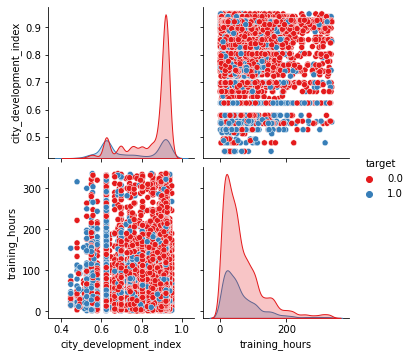

In [48]:
sns.pairplot(data=df, hue="target", palette="Set1")

<AxesSubplot:>

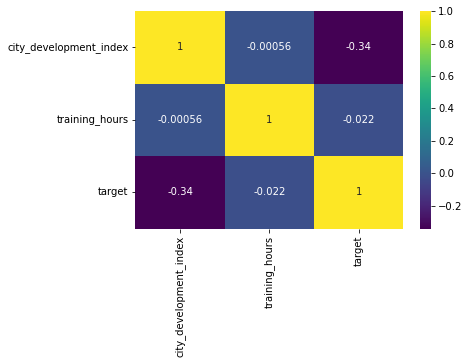

In [55]:
sns.heatmap(df.corr(), annot=True, cmap="viridis")

<br><br>Then we analyze the categorical features. Before visualizing the categorical features, we define their order if necessary.

In [73]:
cat_cols = df.select_dtypes("object").columns

In [74]:
for i in cat_cols:
    print(i,"\n",df[i].unique())

gender 
 ['Male' nan 'Female' 'Other']
relevent_experience 
 ['Has relevent experience' 'No relevent experience']
enrolled_university 
 ['no_enrollment' 'Full time course' nan 'Part time course']
education_level 
 ['Graduate' 'Masters' 'High School' nan 'Phd' 'Primary School']
major_discipline 
 ['STEM' 'Business Degree' nan 'Arts' 'Humanities' 'No Major' 'Other']
experience 
 ['>20' '15' '5' '<1' '11' '13' '7' '17' '2' '16' '1' '4' '10' '14' '18'
 '19' '12' '3' '6' '9' '8' '20' nan]
company_size 
 [nan '50-99' '<10' '10000+' '5000-9999' '1000-4999' '10/49' '100-500'
 '500-999']
company_type 
 [nan 'Pvt Ltd' 'Funded Startup' 'Early Stage Startup' 'Other'
 'Public Sector' 'NGO']
last_new_job 
 ['1' '>4' 'never' '4' '3' '2' nan]
label 
 ['train' 'test']


<br><br>**Ordering Categorical Features**

In [75]:
from pandas.api.types import CategoricalDtype

In [81]:
df.education_level = df.education_level.astype(
    CategoricalDtype(categories = ['Primary School','High School','Graduate', 'Masters','Phd'],
                     ordered = True))
df.company_size = df.company_size.astype(
    CategoricalDtype(categories = ['No Company','<10','10/49','50-99','100-500','500-999','1000-4999','10000+'],
                     ordered = True))

In [77]:
df.experience = df.experience.astype(
    CategoricalDtype(categories = ['<1','1','2','3','4','5','6','7','8','9','10',
                                    '11','12','13','14','15','16','17','18','19','20','>20'],
                     ordered = True))

In [78]:
df.last_new_job = df.last_new_job.astype(
    CategoricalDtype(categories = ['never','1','2','3','>4'],
                     ordered = True))

<br><br>**Visualizing Categorical Features**

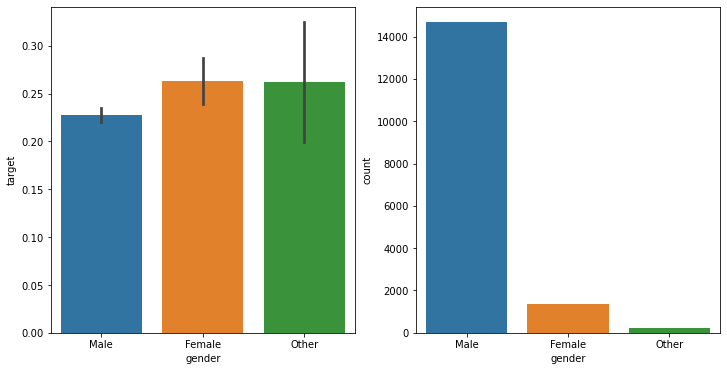

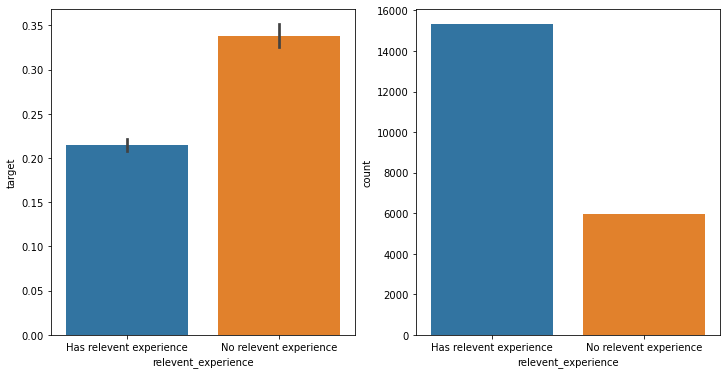

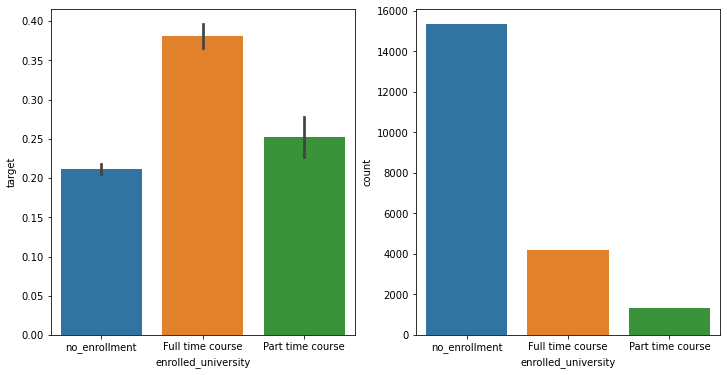

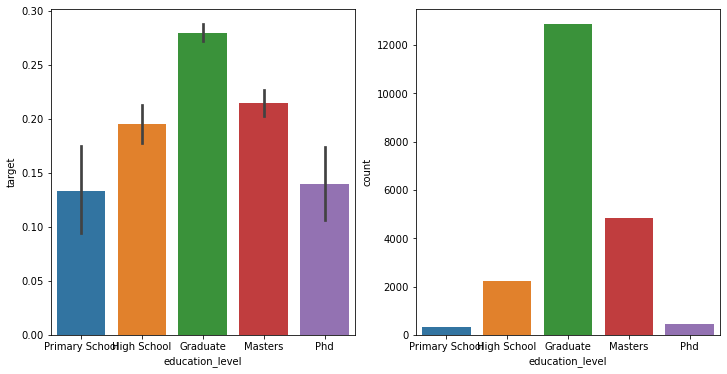

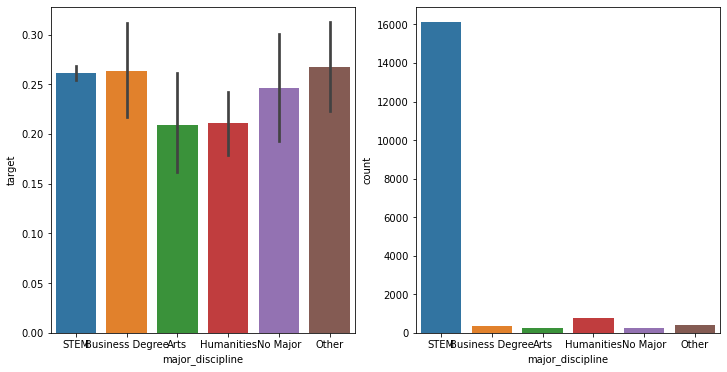

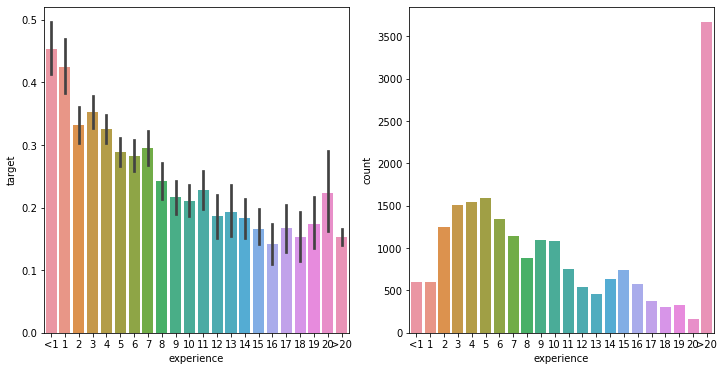

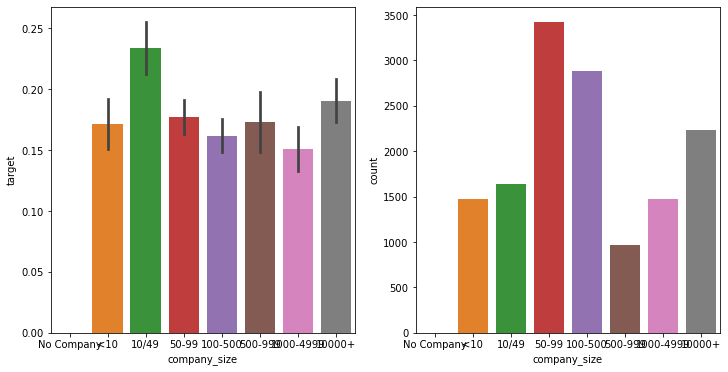

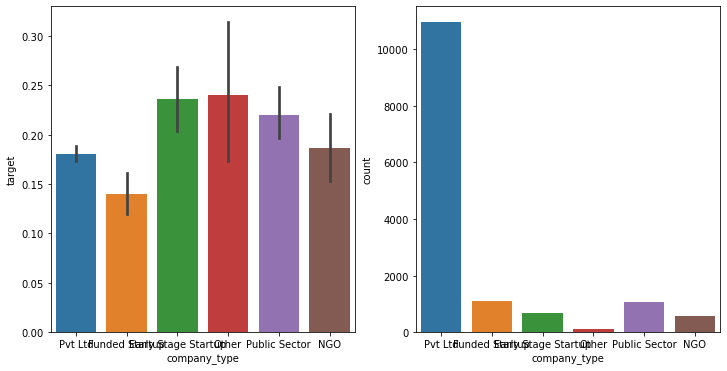

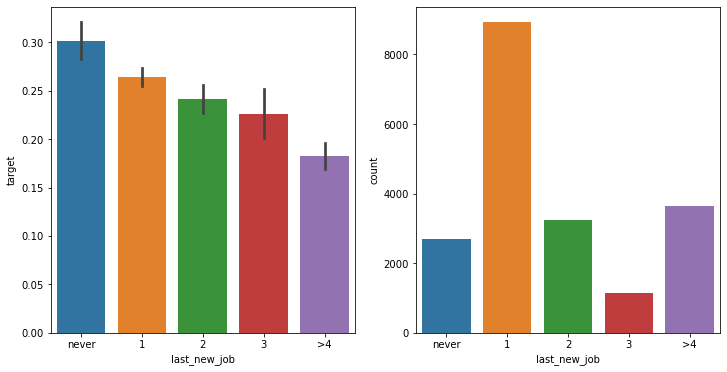

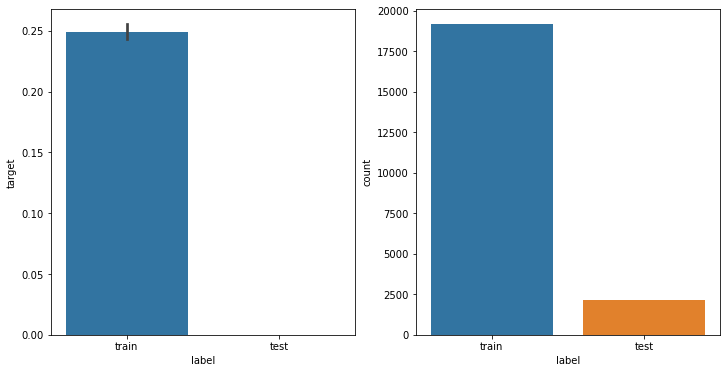

In [90]:
for i in cat_cols:
    fig, axes = plt.subplots(1,2, figsize=(12,6))
    sns.barplot(ax = axes[0],data=df, x=i, y="target")
    sns.countplot(ax = axes[1],data=df, x=i)
    plt.show()

<br><br>

**First Observations**

<ul>
<li>Numerical values, <strong>city development index</strong> and <strong>training hours</strong>, have low correlation with the target value.</li>
<li>Female <strong>gender</strong> has relatively more success rate than males, however, there are mostly male candidates present.</li>
<li>Most candidates have <strong>relevant experience</strong>, yet, they tend to leave their job compared to the candidates with no relevant experince.</li>
<li>The candidates who have not <strong>enrolled university</strong> courses tends to leave more than the other groups, but their number in the sample group is greater.</li>
<li><strong>Education level</strong> plays a siginificant role on the target value. People who graduated from a university is more likely to work than others.</li>
<li><strong>Major discipline</strong> doesn't seem to be a significant factor. Most candidates their major from STEM field.&nbsp;</li>
<li>People tends to leave their job when they gain more <strong>experience </strong>and most candidates have more than 20 years experience.</li>
<li><strong>Company size</strong> and <strong>company type</strong> do not play a significant role on the target value.</li>
<li>Candidates, who are currently working another company or recently left, tends to stay at their new job more than other groups. When <strong>the time between the last job and new job</strong> increases, the probability of leaving increases accordingly.</li>
</ul>

<br><br>

#### 2.2.4. Missing Values (Data Interpretation)

In this section, we analyze the missing values and try to answer "Why they are missing?" in order to save the valuable data. When we simply drop them, we can lose a lot of values and this may cause the bias of the data to increase.

In [91]:
df.isnull().sum()

city_development_index       0
gender                    5016
relevent_experience          0
enrolled_university        417
education_level            512
major_discipline          3125
experience                  70
company_size              7191
company_type              6774
last_new_job              1611
training_hours               0
target                    2129
label                        0
dtype: int64

As seen in the above table, simply dropping the rows containing missing values may cause losses of thousands of data rows.

We go deeper with the missing values. To gain better insight, we can visualize them.

In [94]:
import missingno as msno

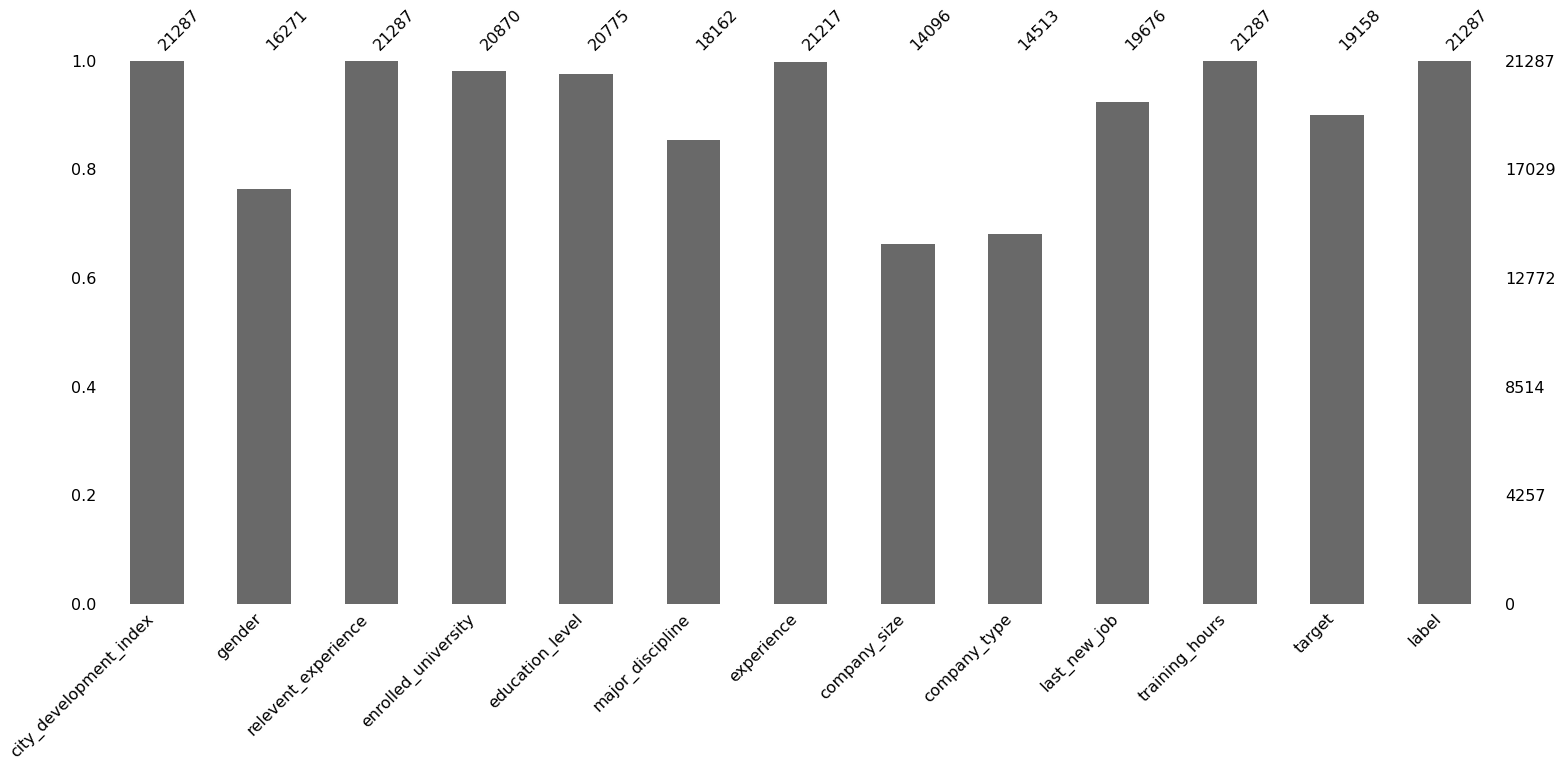

In [95]:
msno.bar(df);

<br><br>**Roadmap for Missing Values**

<ul>
<li><strong>Gender</strong> feature has approximately 25% missing values. Additionally, there is "Other" value in the remaining 75%. At our first observation, we saw that gender may play a significant role. So we can fill these missing values with "other".</li>
<li><strong>Major discipline</strong> has almost 15% missing values. This may be caused by the candidates, who do not have a college degree. For these candidates we can fill the missing values with "No Major". Then, we can determine our roadmap accordingly.&nbsp;</li>
<li><strong>Company size</strong> and <strong>company type</strong> have more than 30% missing values. This may be caused by the candidates, who have no previous work experience. For these candidates we can fill these values with "No company". On the other hand we can consider removing these columns, because we know that they do not play significant role for the target value.</li>
<li><strong>Enrollment to university courses</strong> has small missing ratio, however, they play an important role. We can assume that the missing values are caused by the candidates, who did not enroll, left this value blank.</li>
<li><strong>The time between last job and new job</strong> has more than 5% missing values. The candidates who has no previous work experience could have leave this blank, so we can fill them "never" and decide about others later.</li>
<li>There are 70 missing values for <strong>experience</strong>. This feature is significant, but number of missing values are negligible. Therefore, we can simply drop them.</li>
</ul>

<br><br>**Gender**

In [101]:
df["gender"].unique()

array(['Male', nan, 'Female', 'Other'], dtype=object)

In [102]:
df["gender"].fillna("Other",inplace = True)

<br><br>**Validity of Education Related Values**

In [103]:
df["education_level"].unique()

['Graduate', 'Masters', 'High School', NaN, 'Phd', 'Primary School']
Categories (5, object): ['Primary School' < 'High School' < 'Graduate' < 'Masters' < 'Phd']

<br><br>Missing values in education_level may caused by the candidates who has no educational degree or who left it blank.

<il> **Assumption 1:** If major_discipline is filled when education_level is not, then it is left blank.<br> 
<il> **Assumption 2:** If major_discipline is also missing, then the candidates have no education. 

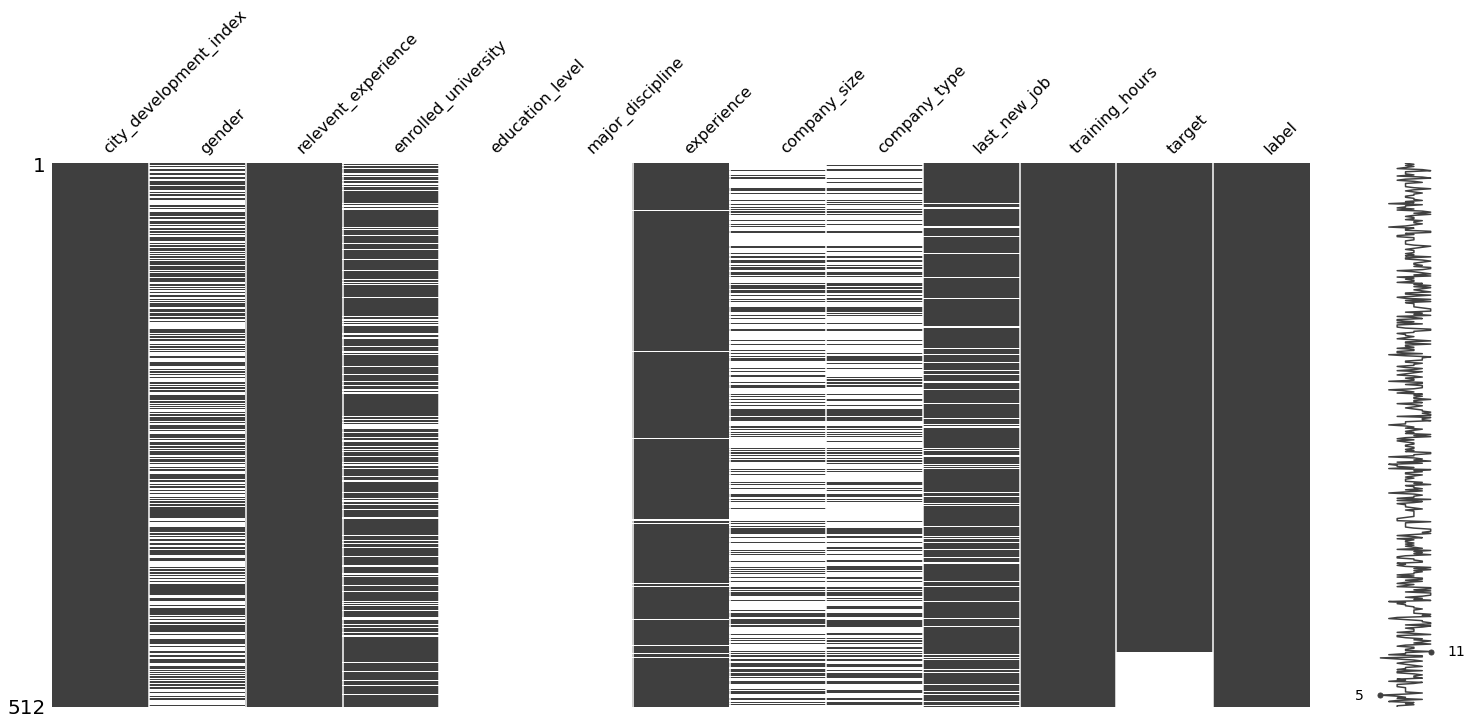

In [97]:
msno.matrix(df[df["education_level"].isnull()]);

<br>**Decision:** We see that when education_level value is missing, so major_discipline is missing. Then, we can fill education_level with "No education" and major_discipline with "No Major" for these candidates.

In [154]:
df.loc[df["education_level"].isnull(),"major_discipline"] = "No Major"

In [158]:
df["education_level"] = df["education_level"].cat.add_categories("No education")

In [159]:
df["education_level"].fillna("No education",inplace = True)

In [160]:
df.isnull().sum()

city_development_index       0
gender                       0
relevent_experience          0
enrolled_university        417
education_level              0
major_discipline          2613
experience                  70
company_size              7191
company_type              6774
last_new_job              1611
training_hours               0
target                    2129
label                        0
dtype: int64

<br><br>**Assumption 3:** The candidates with no college degree has no major discipline.

In [161]:
df[df["major_discipline"].notnull()]["education_level"].unique()

['Graduate', 'Masters', 'No education', 'Phd']
Categories (6, object): ['Primary School' < 'High School' < 'Graduate' < 'Masters' < 'Phd' < 'No education']

<br>This query states that the data is valid in this context. We can also run the following query.

/Users/sevdeaydin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


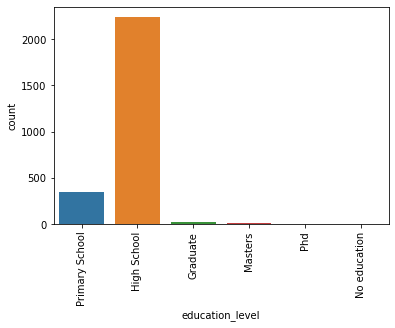

In [164]:
sns.countplot(df[df["major_discipline"].isnull()]["education_level"])
plt.xticks(rotation=90);

**Decision:** The visualization of the candidates, whose major is missing, confirms our assumption. Therefore, we can replace those major discipline values with "No Major". We can drop missing major_discipline for Graduate, Masters and PhD.

In [154]:
df.loc[df["education_level"].isnull(),"major_discipline"] = "No Major"

In [169]:
df.loc[df["education_level"].isin(["Primary School", "High School"]), "major_discipline"] = "No Major"

In [170]:
df.isnull().sum()

city_development_index       0
gender                       0
relevent_experience          0
enrolled_university        417
education_level              0
major_discipline            30
experience                  70
company_size              7191
company_type              6774
last_new_job              1611
training_hours               0
target                    2129
label                        0
dtype: int64

In [174]:
df = df.dropna(subset=["major_discipline"], axis=0)

In [175]:
df.isnull().sum()

city_development_index       0
gender                       0
relevent_experience          0
enrolled_university        416
education_level              0
major_discipline             0
experience                  67
company_size              7179
company_type              6762
last_new_job              1605
training_hours               0
target                    2127
label                        0
dtype: int64

<br><br>

**Previous Jobs/Experience**

**Assumption 1:** If experience is missing, candidates may have no former experience.

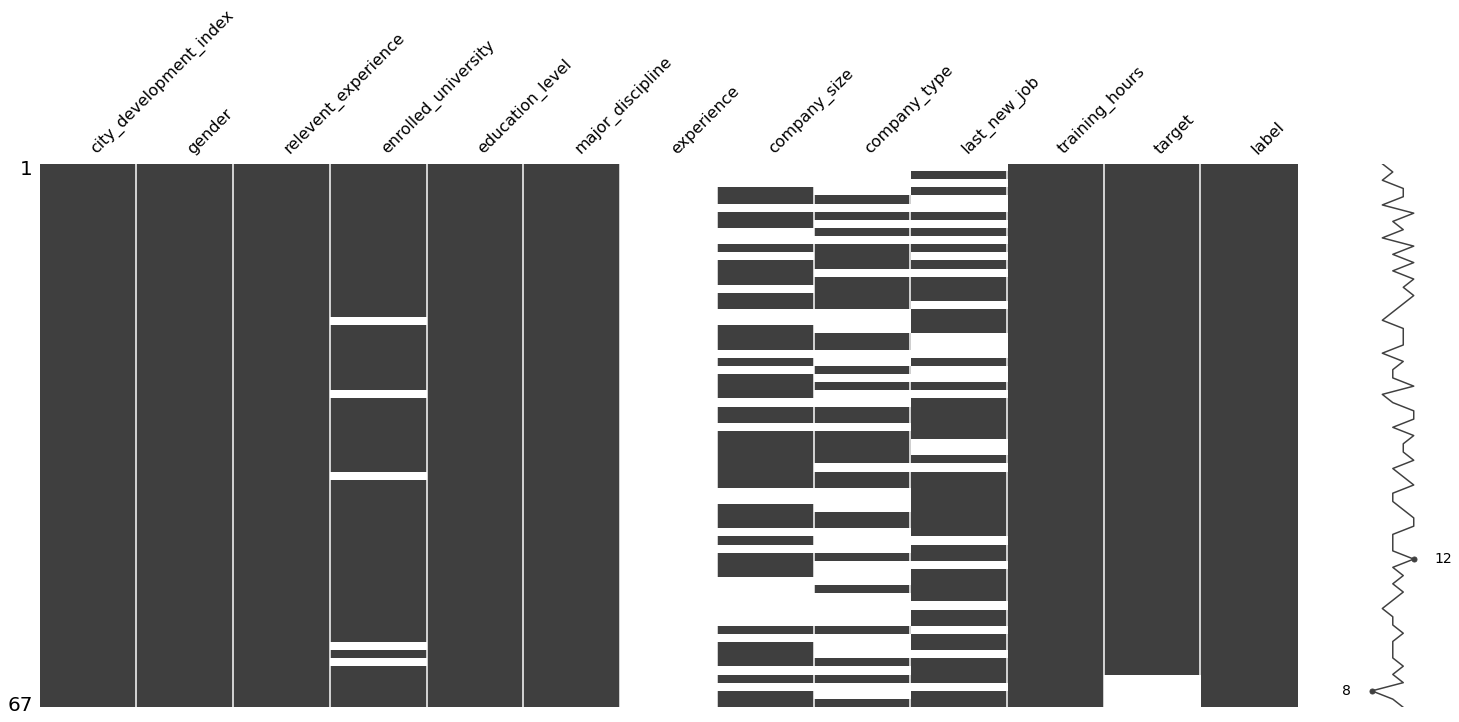

In [177]:
msno.matrix(df[df["experience"].isnull()]);

<br>**Decision:** The Assumption 1 holds for some values. If company_size or company_type is not missing, we can fill experience with "No experience".

In [180]:
job_cols = ['relevent_experience', 'experience', 'company_size', 'company_type', 'last_new_job']

In [181]:
for i in job_cols:
    print(i,"\n",df[i].unique(),"\n")

relevent_experience 
 ['Has relevent experience' 'No relevent experience'] 

experience 
 ['>20', '15', '5', '<1', '11', ..., '6', '9', '8', '20', NaN]
Length: 23
Categories (22, object): ['<1' < '1' < '2' < '3' ... '18' < '19' < '20' < '>20'] 

company_size 
 [NaN, '50-99', '<10', '10000+', '1000-4999', '10/49', '100-500', '500-999']
Categories (8, object): ['No Company' < '<10' < '10/49' < '50-99' < '100-500' < '500-999' < '1000-4999' < '10000+'] 

company_type 
 [nan 'Pvt Ltd' 'Funded Startup' 'Early Stage Startup' 'Other'
 'Public Sector' 'NGO'] 

last_new_job 
 ['1', '>4', 'never', NaN, '3', '2']
Categories (5, object): ['never' < '1' < '2' < '3' < '>4'] 



In [206]:
df["experience"] = df["experience"].cat.add_categories("No experience")

ValueError: new categories must not include old categories: {'No experience'}

In [207]:
mask =(df["company_size"].notnull()) | (df["company_type"].notnull())

In [208]:
df.loc[mask,"experience"] = df.loc[mask,"experience"].fillna("No experience")

In [209]:
df.isnull().sum()

city_development_index       0
gender                       0
relevent_experience          0
enrolled_university        416
education_level              0
major_discipline             0
experience                  22
company_size              7179
company_type              6762
last_new_job              1605
training_hours               0
target                    2127
label                        0
dtype: int64

<br><br>

**Decision:** If the time between last job and new job is "never", then we can fill the experience with "No experience."

In [211]:
mask = (df["last_new_job"] == "never")

In [212]:
df.loc[mask,"experience"] = df.loc[mask,"experience"].fillna("No experience")

In [213]:
df.isnull().sum()

city_development_index       0
gender                       0
relevent_experience          0
enrolled_university        416
education_level              0
major_discipline             0
experience                  16
company_size              7179
company_type              6762
last_new_job              1605
training_hours               0
target                    2127
label                        0
dtype: int64

**Decision:** The remaining experience can be dropped.

In [239]:
df = df.dropna(subset=["experience"], axis=0)

<br><br>**Assumption 2:** The time between last job and new job may be caused by the candidates who has no previous work experience. If so we can fill them with "never".

/Users/sevdeaydin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


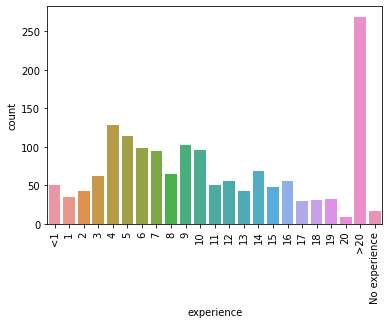

In [215]:
sns.countplot(df[df["last_new_job"].isnull()]["experience"])
plt.xticks(rotation=90);

**Decision:** There are some candidates who has no experience (we can also assume that "<1" is no experience). For these values we can fill "last_new_job" with "never". It is a significant feature, so we do not want to drop them. We can impute other missing values with an ML imputer after manual analysis for all features are completed.

In [217]:
mask =((df["experience"]== "No experience") | (df["experience"] == "<1"))

In [219]:
df.loc[mask,"last_new_job"] = df.loc[mask,"last_new_job"].fillna("never")

In [220]:
df.isnull().sum()

city_development_index       0
gender                       0
relevent_experience          0
enrolled_university        416
education_level              0
major_discipline             0
experience                  16
company_size              7179
company_type              6762
last_new_job              1537
training_hours               0
target                    2127
label                        0
dtype: int64

<br><br>**Assumption 3:** Company size and company type have more than 30% missing values. This may be caused by the candidates, who have no previous work experience. 

/Users/sevdeaydin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


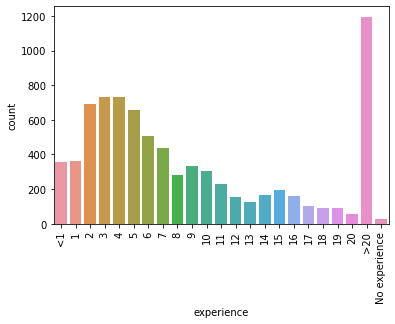

In [223]:
sns.countplot(df[(df["company_size"].isnull()) | (df["company_type"].isnull())]["experience"])
plt.xticks(rotation=90);

**Decision:** Most missing values come from experienced candidates. It would be a waste to remove all observations because these features are not significant for the target value. We can fill for the candidates with no experience for now. We drop the others after the imputation, because they may be useful to impute other features, such as last_new_job.

In [217]:
mask =((df["experience"]== "No experience") | (df["experience"] == "<1"))

In [224]:
df["company_size"] = df["company_size"].cat.add_categories("Other")

In [225]:
df.loc[mask,"company_size"] = df.loc[mask,"company_size"].fillna("Other")

In [227]:
df.loc[mask,"company_type"] = df.loc[mask,"company_type"].fillna("Other")

In [228]:
df.isnull().sum()

city_development_index       0
gender                       0
relevent_experience          0
enrolled_university        416
education_level              0
major_discipline             0
experience                  16
company_size              6836
company_type              6414
last_new_job              1537
training_hours               0
target                    2127
label                        0
dtype: int64

<br><br>

**Enrollment to the University Courses**

**Assumption 4:** Enrollment to university courses</strong> has small missing ratio, however, they play an important role. We can assume that the missing values are caused by the candidates, who did not enroll, left this value blank.

In [231]:
df["enrolled_university"].unique()

array(['no_enrollment', 'Full time course', nan, 'Part time course'],
      dtype=object)

In [233]:
df["enrolled_university"] = df["enrolled_university"].fillna("o_enrollment")

In [249]:
df.isnull().sum()

city_development_index       0
gender                       0
relevent_experience          0
enrolled_university          0
education_level              0
major_discipline             0
experience                   0
company_size              6820
company_type              6398
last_new_job              1530
training_hours               0
target                    2126
label                        0
dtype: int64

<br><br>

#### 2.2.5. ML Imputer and Preparing Variables

In this section we will impute the remaining missing values and finalize our variables for ML process.

In [270]:
new_df = df.copy()

In [271]:
new_df.drop(["target", "label"], axis=1,inplace=True)

In [272]:
X = pd.get_dummies(new_df,drop_first=True)

In [273]:
from sklearn.impute import KNNImputer

In [274]:
imputer = KNNImputer(n_neighbors=5)

In [275]:
X_imputed = imputer.fit_transform(X)

In [278]:
df_dummy = pd.DataFrame(data=X_imputed, index = X.index, columns=X.columns)

In [279]:
df_dummy.columns

Index(['city_development_index', 'training_hours', 'gender_Male',
       'gender_Other', 'relevent_experience_No relevent experience',
       'enrolled_university_Part time course',
       'enrolled_university_no_enrollment', 'enrolled_university_o_enrollment',
       'education_level_High School', 'education_level_Graduate',
       'education_level_Masters', 'education_level_Phd',
       'education_level_No education', 'major_discipline_Business Degree',
       'major_discipline_Humanities', 'major_discipline_No Major',
       'major_discipline_Other', 'major_discipline_STEM', 'experience_1',
       'experience_2', 'experience_3', 'experience_4', 'experience_5',
       'experience_6', 'experience_7', 'experience_8', 'experience_9',
       'experience_10', 'experience_11', 'experience_12', 'experience_13',
       'experience_14', 'experience_15', 'experience_16', 'experience_17',
       'experience_18', 'experience_19', 'experience_20', 'experience_>20',
       'experience_No experienc

In [280]:
df_dummy.drop(['company_size_<10', 'company_size_10/49',
       'company_size_50-99', 'company_size_100-500', 'company_size_500-999',
       'company_size_1000-4999', 'company_size_10000+', 'company_size_Other',
       'company_type_Funded Startup', 'company_type_NGO', 'company_type_Other',
       'company_type_Public Sector', 'company_type_Pvt Ltd'], axis=1, inplace=True)

In [296]:
df_dummy = df_dummy.join( df[["target","label"]])

In [298]:
df_dummy.head()

,city_development_index,training_hours,gender_Male,gender_Other,relevent_experience_No relevent experience,enrolled_university_Part time course,enrolled_university_no_enrollment,enrolled_university_o_enrollment,education_level_High School,education_level_Graduate,...,experience_19,experience_20,experience_>20,experience_No experience,last_new_job_1,last_new_job_2,last_new_job_3,last_new_job_>4,target,label
enrollee_id,,,,,,,,,,,,,,,,,,,,,
8949,0.920,36.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,train
29725,0.776,47.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,train
11561,0.624,83.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,train
33241,0.789,52.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,train
666,0.767,8.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,train


In [300]:
#df_dummy.to_csv("hr_df.csv")

<br><br>

## 3. Conclusion and Discussion

In this work, we have analyzed the data of a company that want to find which candidates really want to work. This is basicly a classification problem. The most important part of this project is the data cleaning. Dropping information from our dataframe may cause loosing valuable information. Most of the times some values are missing for a reason, for example, when we ask the field of PhD to a person who does not have even BSc. In such cases, we do not only lose some data, but also this would harm the bias of our data.

To achieve a successful data cleaning process, each feature individually examined and manually filled with some assumptions. The remaining is imputed using KNN Imputer algorithm. The dummy variables are created and unnecessary features, i.e. those do not affect the target value, are removed. Thus, the dataframe become ready for any Machine Learning algorithm. 

The classification process with various Machine Learning tools are performed in another work in this repository. Check out https://github.com/DrFarukAydin/data-science-portfolio/blob/main/machine-learning/classification-hr.ipynb